# Actividad introducatoria a regresion lineal simple

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv")
df.head(4)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5


In [3]:
df.describe()



,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='str')

In [5]:
df.corr()


,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


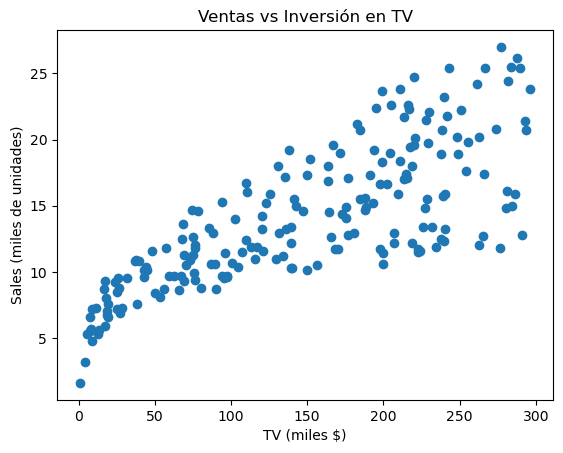

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV (miles $)')
plt.ylabel('Sales (miles de unidades)')
plt.title('Ventas vs Inversión en TV')
plt.show()

## Preguntas
Distribución de variables: ¿Cuál es el rango de TV? ¿Y el de Sales? ¿Hay outliers? Recuerda que los outliers no son únicamente datos fuera de rango...tal vez el fenómeno así es, o tal vez sí fue un error de dedo.

R.- En la gráfica se puede ver que al principio la tendencia es que en cuanto mas inviertas en TV mas ventas tendras, pero conforme pasa la marca de los 100$-150$ miles invertidos las ventas comienzan a dispersarse mucho mas que al principio.

Correlación TV-Sales: ¿Es positiva o negativa? ¿Qué tan fuerte es?

R.- La correlación etre ambos parametros es positiva y es un tanto fuerte. Es claro que las inversiones de Tv reflejan un alto nivel de ventas en la gran mayoría de los casos.

Patrón en el scatter plot: ¿La relación parece lineal? ¿Hay puntos muy alejados del patrón general?

R.- La relación si parece ser lineal pero en cuanto mas sube la invesion de Tvs la incertidumbre de las ventas es mayor. Los datos estan disparados para ventas altas y ventas bajas. Pero la mayor parte de los datos muestra una tendencía lineal.

In [7]:
import numpy as np

# Extraer X y Y
X = df['TV'].values
Y = df['Sales'].values

# Calcular medias
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Calcular beta_1
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean)**2)
beta_1 = numerator / denominator

# Calcular beta_0
beta_0 = Y_mean - beta_1 * X_mean

print(f'beta_0 = {beta_0:.3f}')
print(f'beta_1 = {beta_1:.3f}')

beta_0 = 7.033
beta_1 = 0.048


In [8]:
from sklearn.linear_model import LinearRegression

# Preparar datos (scikit-learn necesita X en formato 2D)
X = df[['TV']]
y = df['Sales']

# Crear y ajustar modelo
model = LinearRegression()
model.fit(X, y)

# Ver coeficientes
print(f'Intercepto: {model.intercept_:.3f}')
print(f'Pendiente: {model.coef_[0]:.3f}')

# Hacer predicciones
y_pred = model.predict(X)

Intercepto: 7.033
Pendiente: 0.048


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE y RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# R cuadrado
r2 = r2_score(y, y_pred)

print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

MSE: 10.513
RMSE: 3.242
R²: 0.612


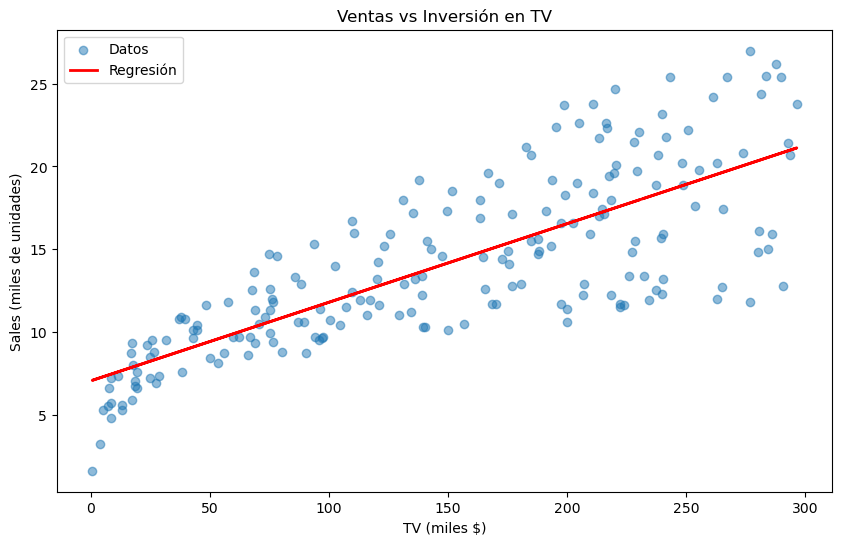

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Datos')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresión')
plt.xlabel('TV (miles $)')
plt.ylabel('Sales (miles de unidades)')
plt.legend()
plt.title('Ventas vs Inversión en TV')
plt.show()

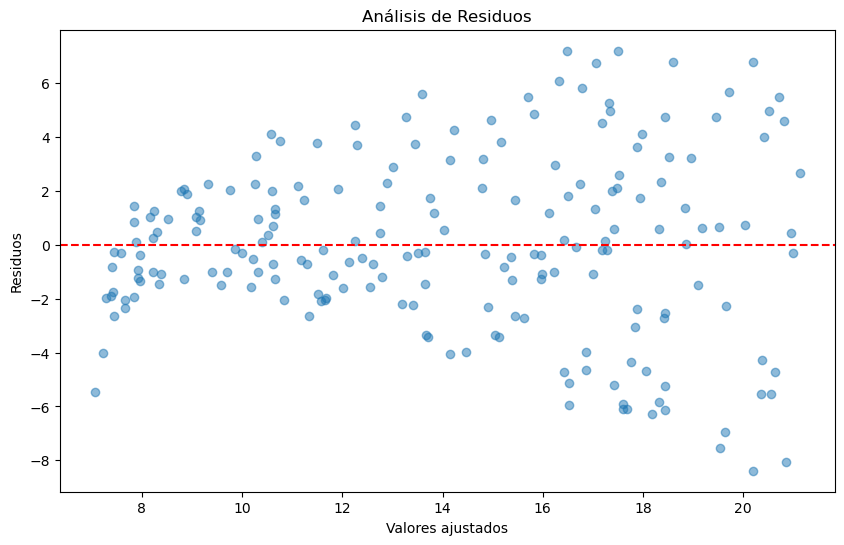

In [11]:
# Calcular residuos
residuals = y - y_pred

# Gráfico de residuos vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.show()

Patrón aleatorio alrededor de cero es buena señal.
Patrón curvo, problema de linealidad (la relación no es lineal).
Forma de embudo (dispersión crece o decrece),  heterocedasticidad.

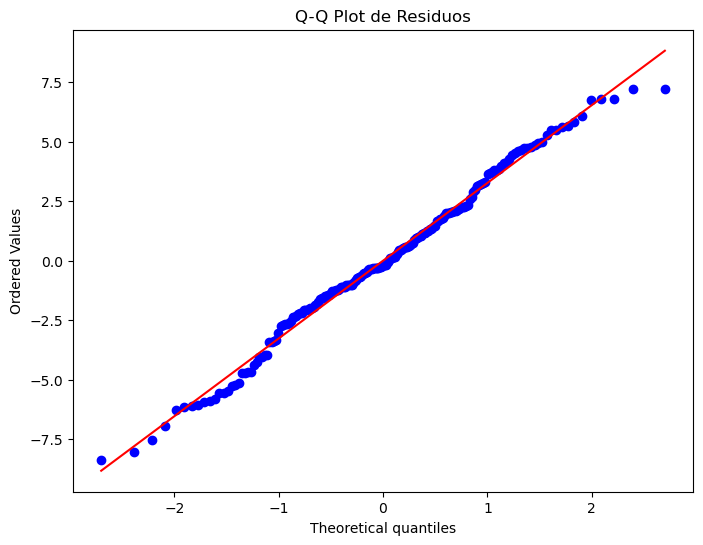

In [12]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.show()

## Responde las siguientes preguntas:

¿Qué significa β₀ = 7.03?
(Pista: ¿cuántas ventas esperarías con $0 de inversión en TV?)

R.- El β₀ indica el intercepro con el eje Y que en este caso son las ventas. Este valor nos dice que si no invertimos ni un solo peso en TV en podriamos esperar un valor de ventas de 7.03. Pero es importante mencionar que β₀ es un promedio de todos los casos en los que no se invirtio en TV.

¿Qué significa β₁ = 0.048?
(Pista: ¿qué pasa con las ventas si aumentas la inversión en TV en mil dólares?)

R.- Al igual que β₀, el indicador β₁ nos dice que si invertimos en TV, EN PROMEDIO podemos esperar que las ventas suban 0.048 veces lo que hayamos invertido

Si inviertes 100 mil dólares más en TV, ¿cuántas ventas adicionales esperas?

R.- En caso de invertir 100 mil dolares podemos hacer el calculo facilmente. El modelo es: $\hat{Y} = \beta_0 + \beta_1 X$. Si sustituimos los valores de β₀, β₁ y $X$ (100) para obtener nuestra predicción ($\hat{Y}$), obtendremos un valor de 11.83 ventas. Es decir que entre todas las inversiones de 100$ mil en TV que hay en la base de datos, el promedio es de ventas es de 11.83. Por esto podriamos esperar un valor similar.


R² = 0.61. ¿Es bueno o malo?
(Pista: ¿qué porcentaje de la variabilidad en ventas explica el modelo? ¿Qué porcentaje queda sin explicar?)(¿Recomendarías invertir más en TV basándote solamente en este análisis?)

R.- Si es bueno, pero no es lo mejor. 0.61 explica el 61% de la variabilidad de las ventas en función de los miles de dolares que se invierta en TV. Es decir resta un 39% que este modelo no explica. Por esta razón podemos inferir que hay otros factores dentro del dataset que deben influir mucho a la cantidad de ventas. Mi recomendacion sería hacer otro analisis de otra variable ya que el modelo no termina de explicar por completo el comportamiento de las ventas. Aun así, si es cierto que la inversion en TV es un factor importante en el comportamiento de las vetnas por lo que si invertiria en TV y complementariamente invertiria en otro factor que encuentre despues del analisis sugerido.